In [1]:
import numpy as np

import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

In [2]:
# 读取文件原始数据
data = []
labels = []

with open("../logs/bsde_raissi/merge.tsv", encoding='UTF-8') as fileObject:
    for line in fileObject:
        line_split = line.split(',')
        data.append(line_split[:-2])
        labels.append([line_split[-2], line_split[-1]])
        # run_labels.append(line_split[-1])

X = []
for row in data:
    row = [float(x) for x in row]
    X.append(row)

y = np.array([[float(x[0]), float(x[1])] for x in labels])


# train cost model
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.1, 
                                                    random_state=0)

# print(type(y_train))

In [3]:
compile_model = xgb.XGBRegressor(n_estimators=200, 
                         learning_rate=0.05, 
                         max_depth=15, 
                         objective='reg:squarederror')
compile_model.fit(X_train, y_train[:, 0])


# 对测试集进行预测
compile_ans = compile_model.predict(X_test)

print(mean_squared_error(y_test[:, 0], compile_ans))

100.27093531219494


In [4]:
run_model = xgb.XGBRegressor(n_estimators=100, 
                         learning_rate=0.05, 
                         max_depth=10, 
                         objective='reg:squarederror')
run_model.fit(X_train, y_train[:, 1])

run_ans = run_model.predict(X_test)
print(mean_squared_error(y_test[:, 1], run_ans))

1.0987823885009793


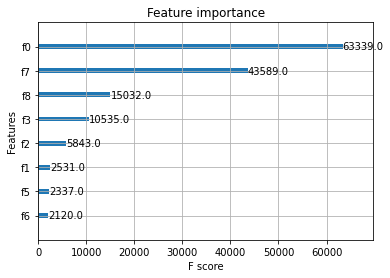

In [5]:
#  显示重要特征
plot_importance(compile_model)
plt.show()

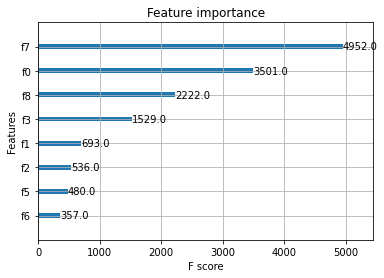

In [7]:
#  显示重要特征
plot_importance(run_model)
plt.show()

In [18]:
latent_sde_test = [[0.008860784, 0.068430336, 7.7228308465706865, 2, 0, 0.067073, 512, 30, 200]]
latent_sde_label = [14.487955093383789,25.443066835403442]

pred_compile_time = compile_model.predict(latent_sde_test)
pred_run_time = run_model.predict(latent_sde_test)
print(pred_compile_time)
print(pred_run_time)

[13.005931]
[14.302388]


In [19]:
latent_sde_test = [[0.008860784,0.068430336,7.7228308465706865,2,0,0.067073,512,1,200]]
latent_sde_label = [1.918602705001831,25.304822206497192]

pred_compile_time = compile_model.predict(latent_sde_test)
pred_run_time = run_model.predict(latent_sde_test)
print(pred_compile_time)
print(pred_run_time)

[1.5538026]
[29.764397]


In [54]:
print(y_test[:, 0])
print(y_test[:, 1])

[ 18.33173561   5.19516063   5.18948174  42.75029826  15.30229354
   7.4143312   68.78501964  10.01750994  18.29659486  18.8797574
  11.52565861   4.69797182  20.65294313   1.58904958  76.47186351
   7.6245842   86.118294    17.01985359  13.93725252  88.03411937
   2.06912088  38.93225884   1.97455549   0.97388244  39.07937574
   8.9685781   13.59410048  10.9530859   21.53769088   1.27068448
   2.39115334   6.2012651   10.66643119  50.09783363 153.11108184
   8.25252604  12.77713919   5.63949394  14.10681915  35.69944859
 164.01785946  39.4712801    7.16037703  17.88015819  11.88399386
  15.65419531  34.223207    42.31560636  39.24433994  14.36439323
  14.33418632   6.94130468   7.66803145   1.34341097  11.40251994
  33.46575761   4.17766786  34.32989407  66.10585141  28.90625167
  13.58003306 140.7377305   11.42465901   2.85187078   9.51389956
   6.05373859  12.42377734   5.25996828  85.79254031  23.98138928
   1.19123149   6.76207399  16.78811097  18.98634601   6.45804405
  26.951231